# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


Dataset shape: (15036, 216)
int64     214
object      2
Name: count, dtype: int64
Training Logistic Regression...
Confusion matrix for Logistic Regression:
 [[1867   29]
 [  37 1075]]
Metrics for Logistic Regression: {'accuracy': 0.9780585106382979, 'precision': 0.9737318840579711, 'recall': 0.966726618705036, 'f1': 0.970216606498195}

Training Random Forest...
Confusion matrix for Random Forest:
 [[1885   11]
 [  30 1082]]
Metrics for Random Forest: {'accuracy': 0.9863696808510638, 'precision': 0.989935956084172, 'recall': 0.9730215827338129, 'f1': 0.98140589569161}

Training SVM (RBF)...
Confusion matrix for SVM (RBF):
 [[1883   13]
 [  38 1074]]
Metrics for SVM (RBF): {'accuracy': 0.9830452127659575, 'precision': 0.9880404783808647, 'recall': 0.9658273381294964, 'f1': 0.9768076398362893}

Training XGBoost...


C:\Users\falgu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion matrix for XGBoost:
 [[1886   10]
 [  21 1091]]
Metrics for XGBoost: {'accuracy': 0.9896941489361702, 'precision': 0.9909173478655767, 'recall': 0.9811151079136691, 'f1': 0.9859918662449164}

Starting hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Metrics for Random Forest (Tuned): {'accuracy': 0.9876994680851063, 'precision': 0.9899726526891522, 'recall': 0.9766187050359713, 'f1': 0.9832503395201448}


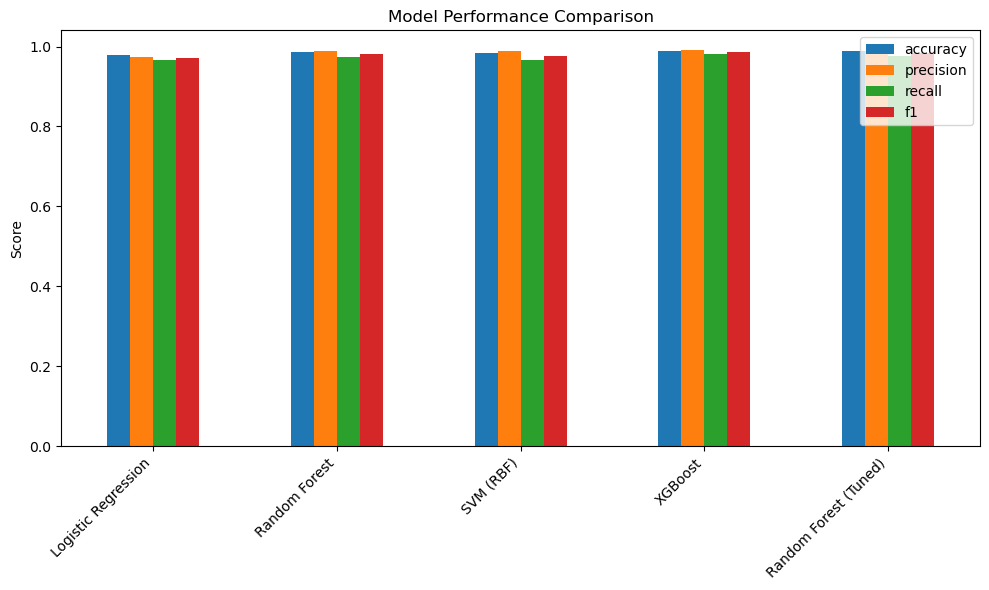

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 1. Load and preprocess the Drebin Android Malware dataset
# Use low_memory=False to avoid mixed-type warnings
df = pd.read_csv(
    'drebin-215-dataset-5560malware-9476-benign.csv', low_memory=False
)

# Inspect basic info
print("Dataset shape:", df.shape)
print(df.dtypes.value_counts())

# Handle missing values (drop or impute)
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Dropped missing values, new shape:", df.shape)

# Identify features and label
# Assuming 'class' column indicates label: 'B' for benign, 'S' for malicious\label_col = 'class' if 'class' in df.columns else df.columns[-1]
X = df.drop(columns=[label_col])
y = df[label_col]

# Encode label to numeric (0 = benign, 1 = malicious)
if y.dtype == object or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y.astype(str))  # 'B'/'S' -> 0/1

# Encode categorical features with mixed types
obj_cols = X.select_dtypes(include=['object', 'category']).columns
if len(obj_cols) > 0:
    le = LabelEncoder()
    for col in obj_cols:
        # Convert all to string to ensure consistency
        X[col] = X[col].astype(str)
        X[col] = le.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Container for metrics
target_metrics = ['accuracy', 'precision', 'recall', 'f1']
results = {}

# 2. Model definitions
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 3. Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {name}:\n", cm)
    print(f"Metrics for {name}: {results[name]}\n")

# 4. (Optional) Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid,
    scoring='f1', cv=3, n_jobs=-1, verbose=1
)
print("Starting hyperparameter tuning for Random Forest...")
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
results['Random Forest (Tuned)'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf)
}
print(f"Metrics for Random Forest (Tuned): {results['Random Forest (Tuned)']}")

# 5. Plot comparison of metrics
results_df = pd.DataFrame(results).T[target_metrics]
ax = results_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Score')
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.